In [14]:
!pip install tensorflow

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#1.

## Load Dataset and Preprocess

In [16]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Digital Image Processing/Lab4/digit-recognizer/train.csv")
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values

X = X / 255.0

## Clusters using Elbow Method

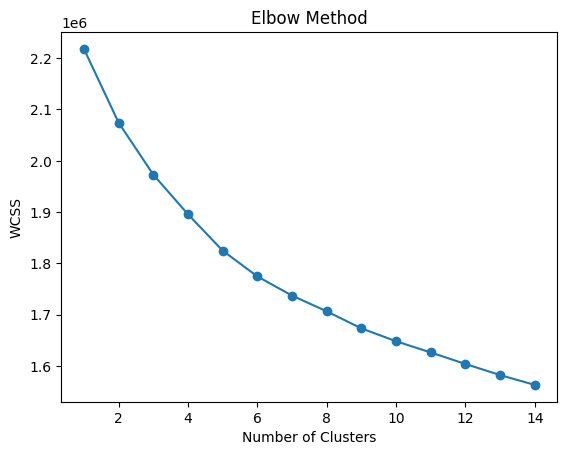

In [17]:
wcss = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 15), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

## Visualize Clusters and Misclustered Images

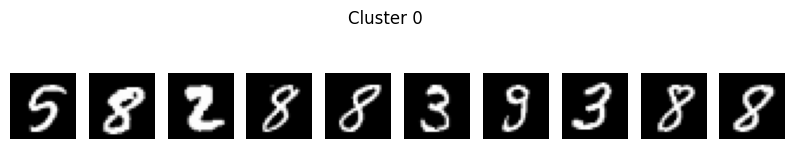

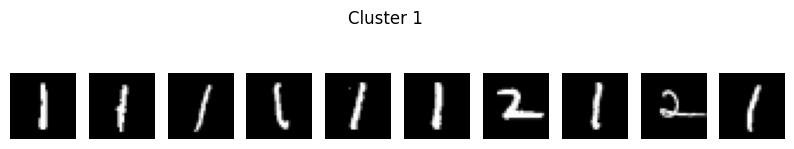

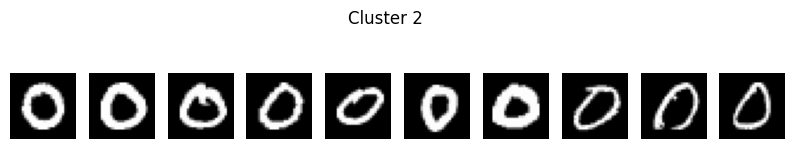

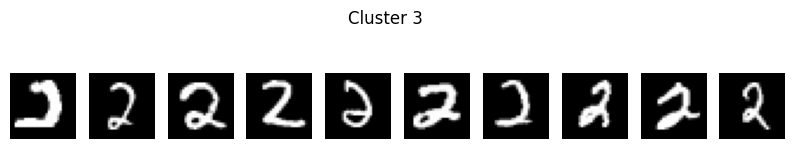

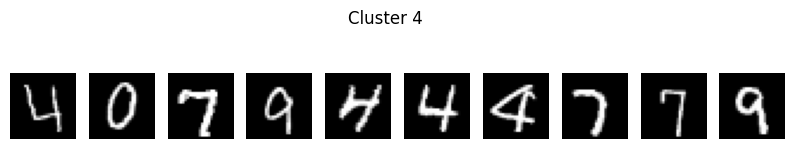

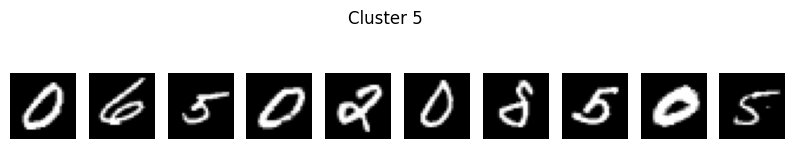

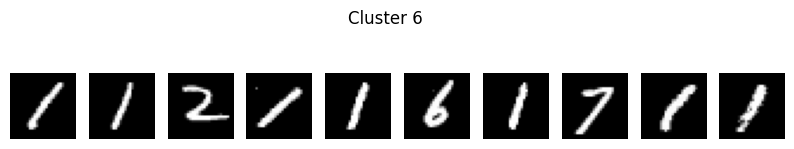

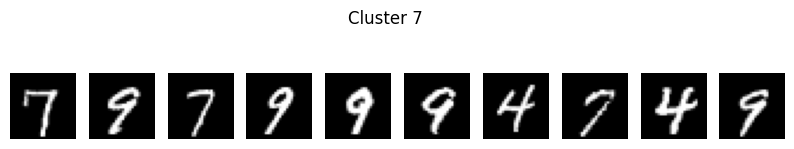

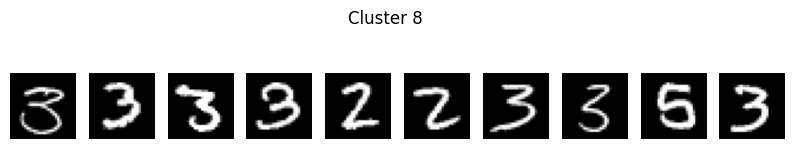

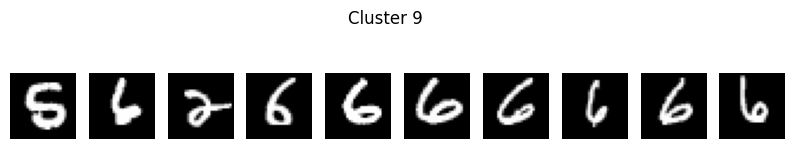

In [18]:
kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(X)

def plot_cluster_images(cluster_num, n_images=10):
    cluster_indices = np.where(clusters == cluster_num)[0]
    plt.figure(figsize=(10, 2))
    for i in range(n_images):
        plt.subplot(1, n_images, i + 1)
        plt.imshow(X[cluster_indices[i]].reshape(28, 28), cmap='gray')
        plt.axis('off')
    plt.suptitle(f'Cluster {cluster_num}')
    plt.show()

for i in range(10):
    plot_cluster_images(i)

## Identify and Justify Misclustered Images

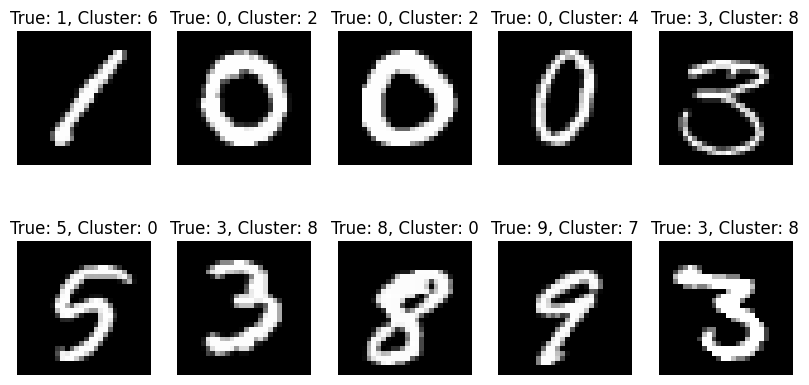

In [19]:
misclustered = []
for i in range(len(X)):
    if y[i] != clusters[i]:
        misclustered.append((X[i], y[i], clusters[i]))

plt.figure(figsize=(10, 5))
for i in range(10):
    img, true_label, pred_cluster = misclustered[i]
    plt.subplot(2, 5, i + 1)
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.title(f"True: {true_label}, Cluster: {pred_cluster}")
    plt.axis('off')
plt.show()

# 2.

##  Train a Classifier Using Artificial Neural Network

In [20]:
import pandas as pd
import numpy as np

train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Digital Image Processing/Lab4/archive/fashion-mnist_train.csv')

x_train = train_data.iloc[:, 1:].values
y_train = train_data.iloc[:, 0].values

x_train = x_train / 255.0

x_train_flat = x_train.reshape(x_train.shape[0], -1)

In [21]:
from tensorflow.keras import layers, models

ann_model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile ANN model
ann_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train ANN model (assuming validation data is also provided)
ann_model.fit(x_train_flat, y_train, epochs=10, validation_split=0.2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7715 - loss: 0.6612 - val_accuracy: 0.8550 - val_loss: 0.4139
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8543 - loss: 0.3977 - val_accuracy: 0.8692 - val_loss: 0.3698
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8729 - loss: 0.3494 - val_accuracy: 0.8479 - val_loss: 0.4033
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8765 - loss: 0.3284 - val_accuracy: 0.8648 - val_loss: 0.3668
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8866 - loss: 0.3037 - val_accuracy: 0.8758 - val_loss: 0.3498
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8916 - loss: 0.2875 - val_accuracy: 0.8697 - val_loss: 0.3587
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8991 - loss: 0.2683 - val_accuracy: 0.8813 - val_loss: 0.3341
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9031 - loss: 0.2619 -

## Train a Classifier Using Convolutional Neural Network

In [34]:
import tensorflow as tf
from tensorflow.keras import layers, models, Input
import matplotlib.pyplot as plt

cnn_model = models.Sequential([
    Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

cnn_model.fit(x_train_cnn, y_train, epochs=10, validation_split=0.2, batch_size=32)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 67s 44ms/step - accuracy: 0.7454 - loss: 0.7053 - val_accuracy: 0.8635 - val_loss: 0.3831
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 72s 37ms/step - accuracy: 0.8766 - loss: 0.3414 - val_accuracy: 0.8836 - val_loss: 0.3203
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 39ms/step - accuracy: 0.8935 - loss: 0.2893 - val_accuracy: 0.8962 - val_loss: 0.2971
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 55s 37ms/step - accuracy: 0.9059 - loss: 0.2547 - val_accuracy: 0.8921 - val_loss: 0.3027
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 57s 38ms/step - accuracy: 0.9158 - loss: 0.2318 - val_accuracy: 0.9079 - val_loss: 0.2536
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 39ms/step - accuracy: 0.9252 - loss: 0.2035 - val_accuracy: 0.9072 - val_loss: 0.2613
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 38ms/step - accuracy: 0.9314 - loss: 0.1830 - val_accuracy: 0.9072 - val_loss: 0.2583
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 39ms/step - accuracy: 0.9397 -

##  Identify the Difference Between ANN and CNN

In [35]:
ann_loss, ann_accuracy = ann_model.evaluate(x_train_flat, y_train, verbose=0)
print(f"ANN Model Accuracy: {ann_accuracy:.2f}, Loss: {ann_loss:.2f}")

cnn_loss, cnn_accuracy = cnn_model.evaluate(x_train_cnn, y_train, verbose=0)
print(f"CNN Model Accuracy: {cnn_accuracy:.2f}, Loss: {cnn_loss:.2f}")

ANN Model Accuracy: 0.90, Loss: 0.28
CNN Model Accuracy: 0.95, Loss: 0.16


## Visualize CNN Layers

In [41]:
_ = cnn_model.predict(x_train_cnn[:1])

layer_outputs = [layer.output for layer in cnn_model.layers if isinstance(layer, layers.Conv2D)]
feature_extractor = models.Model(inputs=cnn_model.input, outputs=layer_outputs)

test_image = x_train_cnn[0].reshape(1, 28, 28, 1)
feature_maps = feature_extractor.predict(test_image)

def plot_feature_maps(feature_maps, title_prefix="Feature Maps - Layer"):

    for layer_idx, feature_map in enumerate(feature_maps):
        num_filters = feature_map.shape[-1]

        plt.figure(figsize=(15, 15))
        plt.suptitle(f'{title_prefix} {layer_idx + 1}', fontsize=16)

        filters_to_display = min(num_filters, 32)

        for filter_idx in range(filters_to_display):
            plt.subplot(6, 6, filter_idx + 1)
            plt.imshow(feature_map[0, :, :, filter_idx], cmap='viridis')
            plt.axis('off')

        plt.tight_layout()
        plt.show()

plot_feature_maps(feature_maps)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


ValueError: The layer sequential_7 has never been called and thus has no defined input.

## Inverse DFT

f Print
[[ 6.70600200e+06     +0.j          2.69018260e+05+433674.97851432j
   6.09936071e+04-133210.04818167j ...  9.84954944e+04 -43681.27902043j
   6.09936071e+04+133210.04818167j  2.69018260e+05-433674.97851432j]
 [-2.94329408e+05+302469.99213697j -5.30510076e+05+113856.36172917j
  -2.27314448e+05 +17171.16734182j ... -3.34959502e+04 -35211.27928816j
   1.73141246e+05-124910.25419381j  1.63573279e+05+302467.8478805j ]
 [ 4.11956635e+05+454713.55933997j -1.43770722e+05 -23229.64607895j
  -7.22868026e+04+170251.93631219j ...  4.86479554e+03 +41831.64866292j
  -8.97039533e+04 -57277.32372549j  3.85610248e+04 -70945.98527589j]
 ...
 [-2.98636770e+05-265312.20223164j -9.34565150e+04 +12599.80119518j
  -8.51331017e+04 -26582.02829888j ... -7.94577283e+04 +38370.09422148j
   3.53520010e+04+178727.45086195j  2.02298262e+05+102186.25327219j]
 [ 4.11956635e+05-454713.55933997j  3.85610248e+04 +70945.98527589j
  -8.97039533e+04 +57277.32372549j ...  1.12680833e+04 +34371.39891552j
  -7.228680

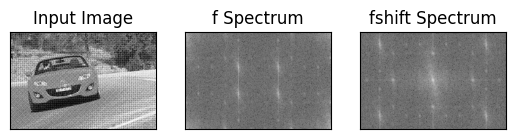

In [43]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('/content/drive/MyDrive/Colab Notebooks/Digital Image Processing/Lab4/car-2.jpg',0) ## read image as grayscale
f = np.fft.fft2(img) ## pass grayscale image
fshift = np.fft.fftshift(f) ## Shift the zero-frequency component to the center of the spectrum.
magnitude_spectrum = 20*np.log(np.abs(fshift)) ## apply logarithm, otherwise the image can not identify easily, change and see the changes.
print ('f Print')
print (f)
magnitude_spectrum1 = 20*np.log(np.abs(f))
print (' ')
print ('fshift Print')
print (fshift)

plt.subplot(131), plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(magnitude_spectrum1, cmap = 'gray')
plt.title('f Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('fshift Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

## Reconstruction Image

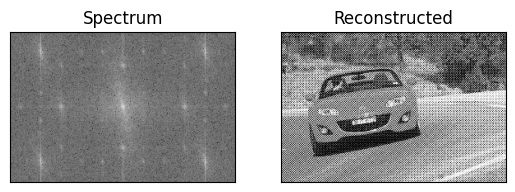

In [44]:
I2= np.fft.ifft2(f) # f is transformed image
I3 = np.real(I2) # get the real part
plt.subplot(121), plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(I3, cmap = 'gray')
plt.title('Reconstructed'), plt.xticks([]), plt.yticks([])
plt.show()

## DFT Filtering

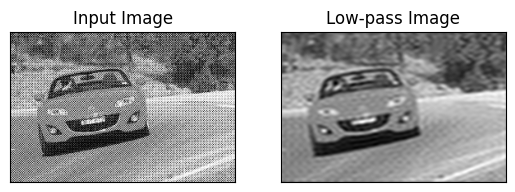

In [45]:
import cv2
img_float32 = np.float32(img)
dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
rows, cols = img.shape
crow, ccol = rows//2, cols//2 # center
# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1
# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Low-pass Image'), plt.xticks([]), plt.yticks([])
plt.show()

# Lab Tasks

## Highpass Filter

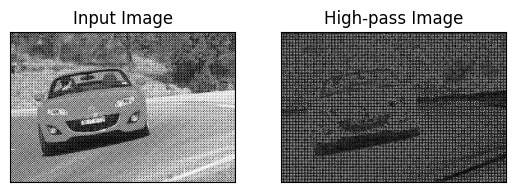

In [46]:
img_float32 = np.float32(img)
dft = cv.dft(img_float32, flags=cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

rows, cols = img.shape
crow, ccol = rows // 2, cols // 2

mask = np.ones((rows, cols, 2), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 0

fshift = dft_shift * mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv.idft(f_ishift)
img_back = cv.magnitude(img_back[:, :, 0], img_back[:, :, 1])

plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_back, cmap='gray')
plt.title('High-pass Image'), plt.xticks([]), plt.yticks([])

plt.show()

## Highpass Laplacian Filter

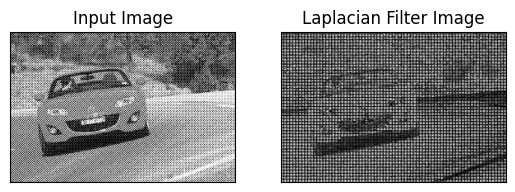

In [47]:
img_float32 = np.float32(img)
dft = cv.dft(img_float32, flags=cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

rows, cols = img.shape
crow, ccol = rows // 2, cols // 2

u = np.arange(-ccol, cols - ccol)
v = np.arange(-crow, rows - crow)
U, V = np.meshgrid(u, v)

D = np.sqrt(rows**2 + cols**2)
laplacian_filter = -4 * (np.pi**2) * ((U**2 + V**2) / (D**2))

laplacian_filter = laplacian_filter[:, :, np.newaxis]
laplacian_filter = laplacian_filter + np.zeros_like(dft_shift)

fshift_laplacian = dft_shift * laplacian_filter

f_ishift = np.fft.ifftshift(fshift_laplacian)
img_back = cv.idft(f_ishift)
img_back = cv.magnitude(img_back[:, :, 0], img_back[:, :, 1])

plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(img_back, cmap='gray')
plt.title('Laplacian Filter Image'), plt.xticks([]), plt.yticks([])

plt.show()

## Highpass Filter - D0 = 100

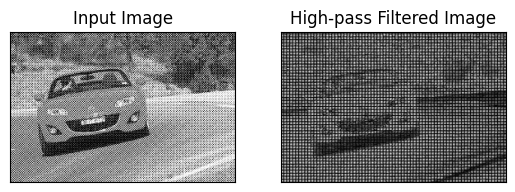

In [48]:
img_float32 = np.float32(img)
dft = cv.dft(img_float32, flags=cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

rows, cols = img.shape
crow, ccol = rows // 2, cols // 2

d0 = 100

mask = np.ones((rows, cols, 2), np.uint8)

center = (crow, ccol)
for i in range(rows):
    for j in range(cols):
        distance = np.sqrt((i - crow)**2 + (j - ccol)**2)
        if distance <= d0:
            mask[i, j] = 0

fshift = dft_shift * mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv.idft(f_ishift)
img_back = cv.magnitude(img_back[:, :, 0], img_back[:, :, 1])

plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(img_back, cmap='gray')
plt.title('High-pass Filtered Image'), plt.xticks([]), plt.yticks([])

plt.show()

## Lowpass Filter - D0 = 100

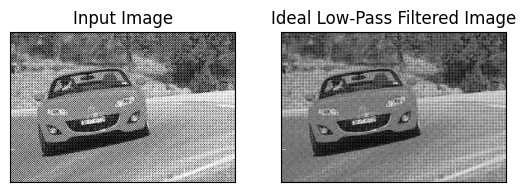

In [50]:
d0 = 100
mask = np.zeros((rows, cols, 2), np.uint8)

for i in range(rows):
    for j in range(cols):
        distance = np.sqrt((i - crow)**2 + (j - ccol)**2)
        if distance <= d0:
            mask[i, j] = 1

fshift_lowpass = dft_shift * mask
f_ishift = np.fft.ifftshift(fshift_lowpass)
img_lowpass = cv.idft(f_ishift)
img_lowpass = cv.magnitude(img_lowpass[:, :, 0], img_lowpass[:, :, 1])

plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_lowpass, cmap='gray')
plt.title('Ideal Low-Pass Filtered Image'), plt.xticks([]), plt.yticks([])
plt.show()

## Apply FFT2, IFFT2, Low-Pass Gaussian Filter, and High-Pass Laplacian Filter

### Low-Pass Gaussian Filter

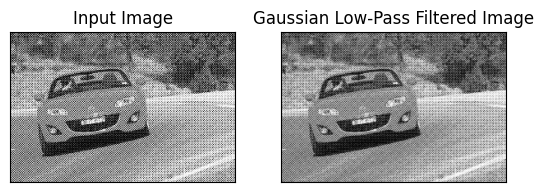

In [51]:
x, y = np.meshgrid(np.linspace(-ccol, ccol, cols), np.linspace(-crow, crow, rows))
gaussian_mask = np.exp(-(x**2 + y**2) / (2 * d0**2))

fshift_gaussian = dft_shift * gaussian_mask[:, :, np.newaxis]
f_ishift = np.fft.ifftshift(fshift_gaussian)
img_gaussian = cv.idft(f_ishift)
img_gaussian = cv.magnitude(img_gaussian[:, :, 0], img_gaussian[:, :, 1])

plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_gaussian, cmap='gray')
plt.title('Gaussian Low-Pass Filtered Image'), plt.xticks([]), plt.yticks([])
plt.show()

### High-Pass Laplacian Filter

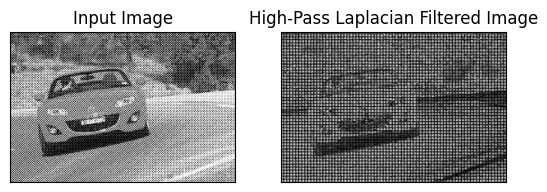

In [52]:
laplacian_filter = -4 * (np.pi**2) * ((x**2 + y**2) / (rows**2 + cols**2))
laplacian_mask = laplacian_filter[:, :, np.newaxis] + np.zeros_like(dft_shift)

fshift_laplacian = dft_shift * laplacian_mask
f_ishift = np.fft.ifftshift(fshift_laplacian)
img_laplacian = cv.idft(f_ishift)
img_laplacian = cv.magnitude(img_laplacian[:, :, 0], img_laplacian[:, :, 1])

plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_laplacian, cmap='gray')
plt.title('High-Pass Laplacian Filtered Image'), plt.xticks([]), plt.yticks([])
plt.show()

## Correct the Noise in the Image

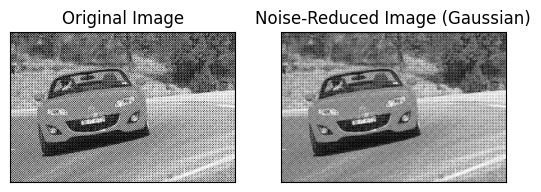

In [53]:
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_gaussian, cmap='gray')
plt.title('Noise-Reduced Image (Gaussian)'), plt.xticks([]), plt.yticks([])
plt.show()

## . Apply Sobel Operator in the Fourier Domain

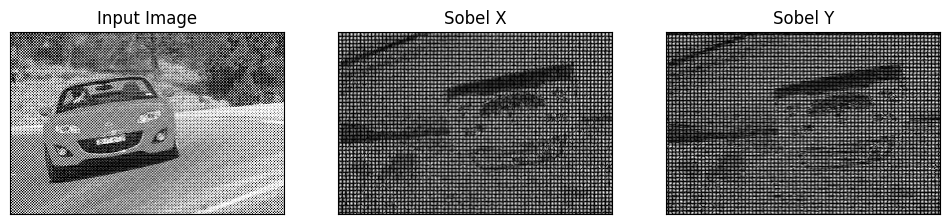

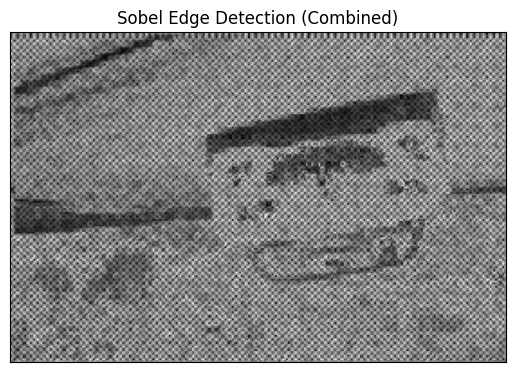

In [60]:
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

# Pad Sobel kernels to match the size of the image
sobel_x_padded = np.zeros_like(img, dtype=np.float32)
sobel_y_padded = np.zeros_like(img, dtype=np.float32)

sobel_x_padded[:3, :3] = sobel_x
sobel_y_padded[:3, :3] = sobel_y

# Perform FFT on Sobel kernels
sobel_x_dft = np.fft.fft2(sobel_x_padded, s=img.shape[:2])
sobel_y_dft = np.fft.fft2(sobel_y_padded, s=img.shape[:2])

# Split real and imaginary parts of the DFT
real_part = dft_shift[:, :, 0]
imag_part = dft_shift[:, :, 1]

# Apply Sobel filters to the real and imaginary parts
real_sobel_x = real_part * sobel_x_dft
real_sobel_y = real_part * sobel_y_dft
imag_sobel_x = imag_part * sobel_x_dft
imag_sobel_y = imag_part * sobel_y_dft

# Combine the real and imaginary parts back
fshift_sobel_x = real_sobel_x + 1j * imag_sobel_x
fshift_sobel_y = real_sobel_y + 1j * imag_sobel_y

# Perform inverse FFT to reconstruct the Sobel-filtered images
img_sobel_x = np.abs(np.fft.ifft2(fshift_sobel_x))
img_sobel_y = np.abs(np.fft.ifft2(fshift_sobel_y))

# Combine Sobel X and Y results
img_sobel = np.sqrt(img_sobel_x**2 + img_sobel_y**2)

# Visualize the results
plt.figure(figsize=(12, 8))

plt.subplot(131)
plt.imshow(img, cmap='gray')
plt.title('Input Image')
plt.xticks([]), plt.yticks([])

plt.subplot(132)
plt.imshow(img_sobel_x, cmap='gray')
plt.title('Sobel X')
plt.xticks([]), plt.yticks([])

plt.subplot(133)
plt.imshow(img_sobel_y, cmap='gray')
plt.title('Sobel Y')
plt.xticks([]), plt.yticks([])

plt.figure()
plt.imshow(img_sobel, cmap='gray')
plt.title('Sobel Edge Detection (Combined)')
plt.xticks([]), plt.yticks([])
plt.show()


## Implementation of Butterworth Filter

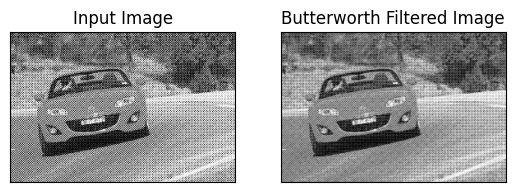

In [55]:
butterworth_mask = np.zeros((rows, cols), np.float32)
n = 2

for i in range(rows):
    for j in range(cols):
        distance = np.sqrt((i - crow)**2 + (j - ccol)**2)
        butterworth_mask[i, j] = 1 / (1 + (distance / d0)**(2 * n))

fshift_butterworth = dft_shift * butterworth_mask[:, :, np.newaxis]
f_ishift = np.fft.ifftshift(fshift_butterworth)
img_butterworth = cv.idft(f_ishift)
img_butterworth = cv.magnitude(img_butterworth[:, :, 0], img_butterworth[:, :, 1])

plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_butterworth, cmap='gray')
plt.title('Butterworth Filtered Image'), plt.xticks([]), plt.yticks([])
plt.show()